# Markdown 
Otras formas de trabajo
#   Datos a usar
cuántitativas: 
P3094S3 : Cuánto ahorro por cultivar
# Cualitativas

P3101: ¿Fue a reuniones familiares durante las ultimas 4 semanas? si o no

In [ ]:
library(tidyverse)
setwd("C:/Users/CENTIC/Desktop/estadistica2taller1")

In [ ]:
# Archivos
csv_files <- c(
  "Julio_2024/CSV/Otras formas de trabajo.CSV",
  "Junio_2024/CSV/Otras formas de trabajo.CSV",
  "Mayo_2024 1/CSV/Otras formas de trabajo.CSV"
)

# Columnas necesarias
cols_needed <- c("P3094S3", "P3087S1", "P3095S3", "P3101")

# Función para leer y limpiar
read_and_clean <- function(file) {
  df <- read_delim(
    file,
    delim = ";",
    col_names = TRUE,
    show_col_types = FALSE,
    locale = locale(encoding = "UTF-8"),
    guess_max = 10000
  )
  
  # Seleccionar solo las columnas necesarias
  df <- df %>% select(any_of(cols_needed))
  
  # Limpiar y convertir valores monetarios
  df <- df %>%
    mutate(
      across(c("P3094S3", "P3087S1", "P3095S3"), ~ {
        x <- as.character(.)
        x <- gsub("\\.", "", x)   # eliminar puntos de miles
        x <- gsub(",", ".", x)    # convertir coma a punto decimal si la hay
        suppressWarnings(as.numeric(x))
      })
    )
  
  return(df)
}

# Leer y combinar
combined <- bind_rows(lapply(csv_files, read_and_clean))

# Guardar
write_csv(combined, "Combinado.csv")



Warning message:
"One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)"


✅ Archivo combinado guardado en: C:/Users/juand/OneDrive/libros/estadistica2taller1/Combinado.csv


In [ ]:

library(readr); library(dplyr)

data_path <- "Combinado.csv"
varname   <- "P3094S3"   # variable con la que trabajamos
out_dir   <- "analisis_P3094S3_check"
dir.create(out_dir, showWarnings = FALSE, recursive = TRUE)

# Leer todo como carácter para evitar parseos automáticos
df_char <- readr::read_csv(data_path,
                           col_types = readr::cols(.default = "c"),
                           locale = readr::locale(encoding = "UTF-8"),
                           show_col_types = FALSE)

# detectar nombre real (insensible a mayúsculas)
if (!varname %in% names(df_char)) {
  guess <- names(df_char)[tolower(names(df_char)) %in% tolower(varname)]
  if (length(guess) == 1) varname_real <- guess else stop("No encontré la variable ", varname)
} else varname_real <- varname

# función robusta de limpieza numérica (monedas, separadores, etc.)
clean_numeric2 <- function(x) {
  x <- as.character(x)
  x[ x %in% c("", "NA", NA) ] <- NA_character_
  x <- trimws(x)
  x <- gsub("\\s+", "", x)
  x <- gsub("[^0-9\\,\\.-]", "", x)
  both <- grepl("\\.", x) & grepl(",", x)
  if (any(both)) { x[both] <- gsub("\\.", "", x[both]); x[both] <- gsub(",", ".", x[both]) }
  only_comma <- grepl(",", x) & !grepl("\\.", x)
  x[only_comma] <- gsub(",", ".", x[only_comma])
  suppressWarnings(as.numeric(x))
}

# preparar df_var con la variable limpia y sin modificar el CSV original
df_var <- df_char %>%
  transmute(
    value_raw = .data[[varname_real]],
    value = clean_numeric2(.data[[varname_real]])
  )

# info rápida
cat("Variable real detectada:", varname_real, "\n")
cat("Total filas:", nrow(df_var), "   N no-missing:", sum(!is.na(df_var$value)), "\n")
# ver primeras filas
print(head(df_var, 10))


Variable real detectada: P3094S3 
Total filas: 166341    N no-missing: 2892 
# A tibble: 10 × 2
   value_raw value
   <chr>     <dbl>
 1 NA           NA
 2 NA           NA
 3 NA           NA
 4 NA           NA
 5 NA           NA
 6 NA           NA
 7 NA           NA
 8 NA           NA
 9 NA           NA
10 NA           NA


In [ ]:
library(dplyr)

# usa df_var (si no existe la lee desde datos)
if (!exists("df_var")) {
  data_path <- "/home/jovyan/estadistica/Combinado.csv"
  df_var <- readr::read_csv(data_path, col_types = readr::cols(.default = "c"), show_col_types = FALSE) %>%
    transmute(value_raw = .data[[varname]], value = clean_numeric2(.data[[varname]]))
}

x <- df_var$value
x_nm <- x[!is.na(x)]

# calcular medidas
N_total <- length(x)
N_missing <- sum(is.na(x))
Min <- ifelse(length(x_nm)>0, min(x_nm, na.rm=TRUE), NA)
Q1  <- ifelse(length(x_nm)>0, quantile(x_nm, .25, na.rm=TRUE), NA)
Median <- ifelse(length(x_nm)>0, median(x_nm, na.rm=TRUE), NA)
Mean <- ifelse(length(x_nm)>0, mean(x_nm, na.rm=TRUE), NA)
Q3 <- ifelse(length(x_nm)>0, quantile(x_nm, .75, na.rm=TRUE), NA)
Max <- ifelse(length(x_nm)>0, max(x_nm, na.rm=TRUE), NA)
SD <- ifelse(length(x_nm)>0, sd(x_nm, na.rm=TRUE), NA)
IQRv <- ifelse(length(x_nm)>0, IQR(x_nm, na.rm=TRUE), NA)

tabla_vertical <- tibble(
  Medida = c("N total","N missing","Min.","1st Qu.","Median","Mean","3rd Qu.","Max.","SD","IQR"),
  Valor  = c(N_total, N_missing, Min, Q1, Median, Mean, Q3, Max, SD, IQRv)
)

cat("=== Descriptivos Básicos ===\n")
print(tabla_vertical)

# Mostrar estadísticas resumidas estilo summary()
cat("\n=== Summary (sobre valores no-missing) ===\n")
print(summary(x_nm))


=== Descriptivos Básicos ===
# A tibble: 10 × 2
   Medida        Valor
   <chr>         <dbl>
 1 N total     166341 
 2 N missing   163449 
 3 Min.          1000 
 4 1st Qu.      30000 
 5 Median       60000 
 6 Mean        126938.
 7 3rd Qu.     150000 
 8 Max.      20000000 
 9 SD          410083.
10 IQR         120000 

=== Summary (sobre valores no-missing) ===
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
    1000    30000    60000   126938   150000 20000000 


Installing package into 'C:/Users/CENTIC/AppData/Local/R/win-library/4.5'
(as 'lib' is unspecified)



package 'gridExtra' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\CENTIC\AppData\Local\Temp\RtmpwpGtld\downloaded_packages


Warning message:
"package 'gridExtra' was built under R version 4.5.1"

Adjuntando el paquete: 'gridExtra'


The following object is masked from 'package:dplyr':

    combine




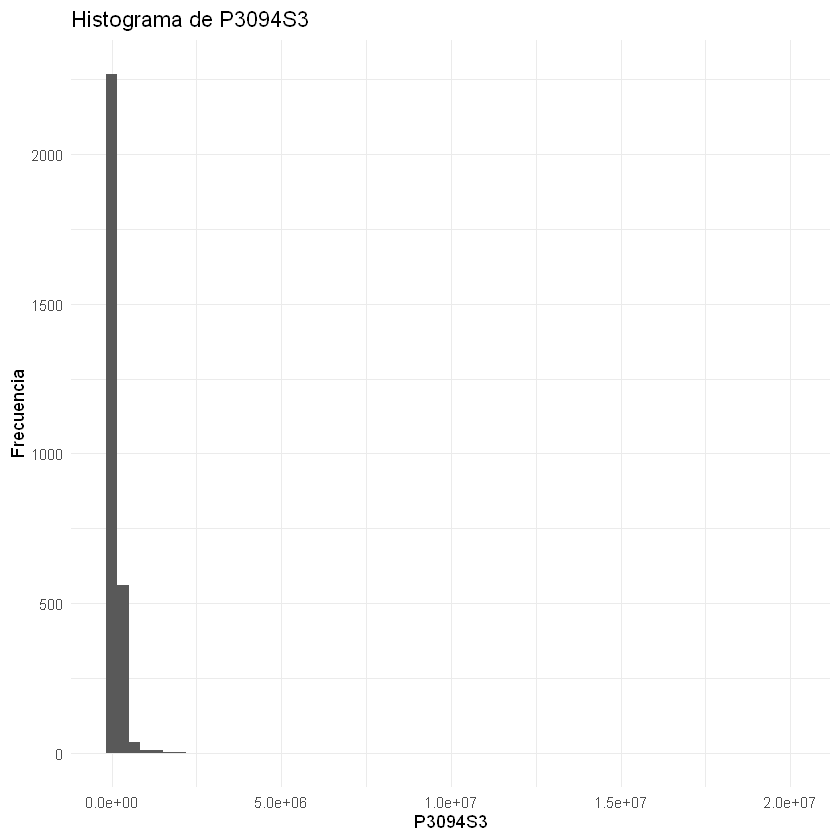

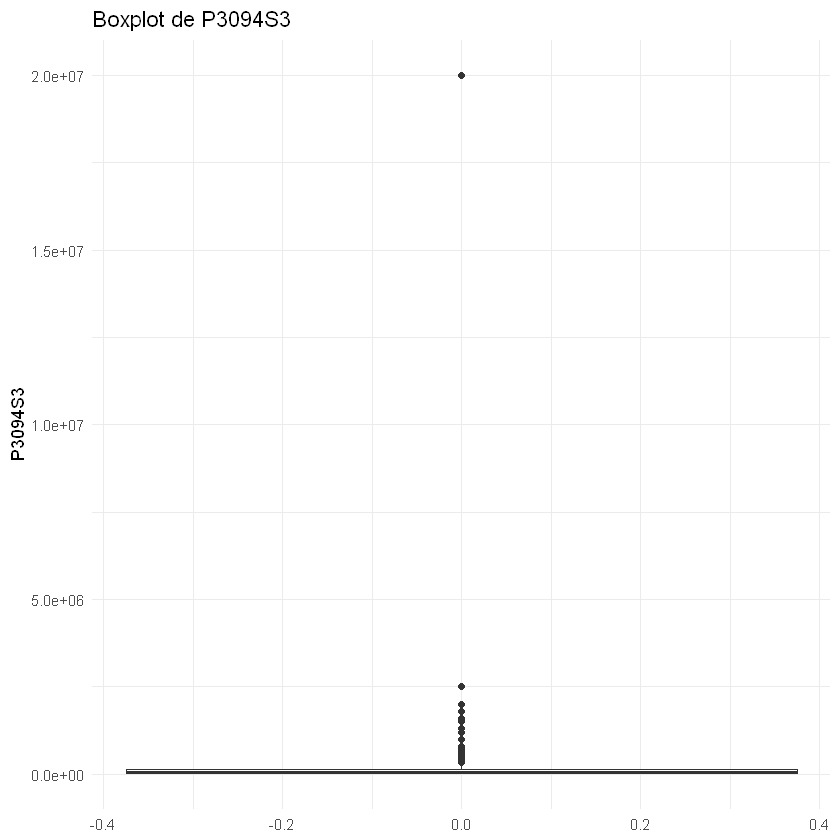

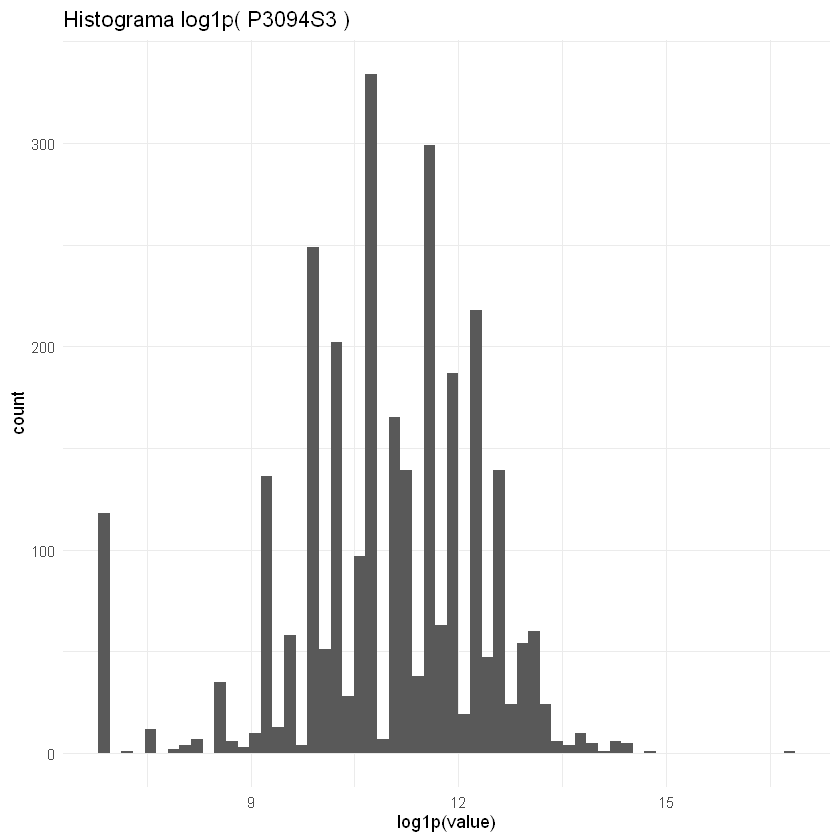

Gráficos guardados en: analisis_P3094S3_check/plots



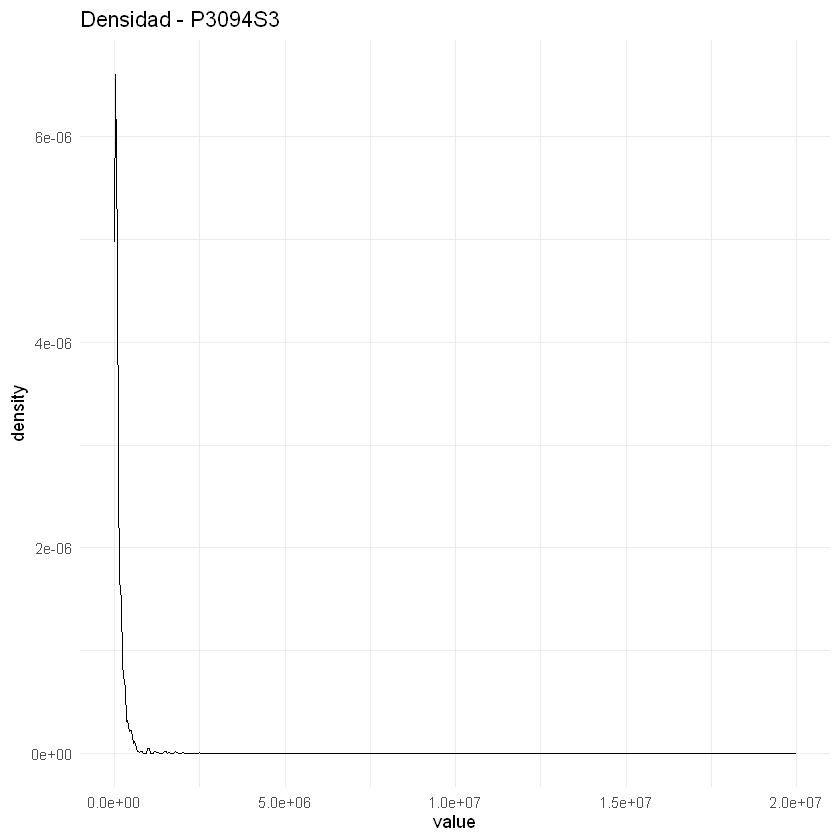

In [ ]:
if (!requireNamespace("gridExtra", quietly = TRUE)) {
  install.packages("gridExtra", repos = "https://cloud.r-project.org")
}
library(gridExtra)

library(ggplot2); 

plot_dir <- file.path(out_dir, "plots")
dir.create(plot_dir, showWarnings = FALSE, recursive = TRUE)

x <- df_var$value
x_nm <- x[!is.na(x)]

if (length(x_nm) == 0) {
  message("No hay datos no-missing: no se generan gráficos.")
} else {
  df_plot <- df_var %>% filter(!is.na(value))

  # Histograma lineal
  ph <- ggplot(df_plot, aes(x=value)) +
    geom_histogram(bins = 60) +
    labs(title = paste("Histograma de", varname_real), x = varname_real, y = "Frecuencia") +
    theme_minimal()
  ggsave(file.path(plot_dir, paste0("hist_", varname_real, ".png")), ph, width=8, height=4)
  print(ph)

  # Boxplot
  pb <- ggplot(df_plot, aes(y=value)) +
    geom_boxplot() +
    labs(title = paste("Boxplot de", varname_real), y = varname_real) +
    theme_minimal()
  ggsave(file.path(plot_dir, paste0("boxplot_", varname_real, ".png")), pb, width=6, height=4)
  print(pb)

  # Histograma log1p (si hay valores > 0)
  if (any(df_plot$value > 0, na.rm=TRUE)) {
    df_plot <- df_plot %>% mutate(value_log1p = log1p(value))
    pl <- ggplot(df_plot, aes(x=value_log1p)) + geom_histogram(bins = 60) +
      labs(title = paste("Histograma log1p(", varname_real, ")"), x = "log1p(value)") + theme_minimal()
    ggsave(file.path(plot_dir, paste0("hist_log1p_", varname_real, ".png")), pl, width=8, height=4)
    print(pl)
  }

  # Density con escala log y sin log
  pd <- ggplot(df_plot, aes(x=value)) + geom_density() + theme_minimal() +
    labs(title = paste("Densidad -", varname_real))
  ggsave(file.path(plot_dir, paste0("density_", varname_real, ".png")), pd, width=8, height=4)
  print(pd)

  message("Gráficos guardados en: ", plot_dir)
}


In [ ]:
est_mean   <- mean(x_nm)
est_median <- median(x_nm)
# MV para media (asumiendo normalidad)
est_MV_mean <- est_mean
est_MV_median <- est_median  # No es MV para mediana pero lo dejamos como referencia

# Moda (pueden haber varias)
mode_basic_all <- function(v) {
  v2 <- v[!is.na(v)]
  if (length(v2) == 0) return(NA)
  tb <- sort(table(v2), decreasing = TRUE)
  names(tb)[tb == max(tb)]
}
modes <- mode_basic_all(x_nm)
mode_report <- paste(modes, collapse = ", ")

cat("===== Estimadores puntuales =====\n\n")

cat("Por Analogía:\n")
cat(sprintf("  Media: %s\n", format(round(est_mean, 2), big.mark=",")))
cat(sprintf("  Mediana: %s\n", format(round(est_median, 2), big.mark=",")))
cat(sprintf("  Moda(s): %s\n\n", mode_report))

cat("Por Máxima Verosimilitud:\n")
cat(sprintf("  Media (MV): %s\n", format(round(est_MV_mean, 2), big.mark=",")))
cat(sprintf("  Mediana (MV, referencia): %s\n\n", format(round(est_MV_median, 2), big.mark=",")))


# 2) Estimadores por intervalo (IC 95%)
cat("===== Estimadores por intervalo (IC 95%) =====\n\n")

# t-interval para media
if (length(x_nm) > 1) {
  tt <- try(t.test(x_nm), silent = TRUE)
  if (!inherits(tt, "try-error")) {
    ci_t <- tt$conf.int
    cat(sprintf("IC 95%% para media (t-interval): [ %s , %s ]\n",
                format(round(ci_t[1], 2), big.mark=","),
                format(round(ci_t[2], 2), big.mark=",")))
  } else {
    cat("No se pudo calcular IC t-interval para media.\n")
  }
} else {
  cat("No hay datos suficientes para calcular IC t-interval para media.\n")
}

# Bootstrap para media
if (!inherits(boot_mean, "try-error")) {
  ci_mean <- tryCatch({
    boot.ci(boot_mean, type = c("perc","bca"))
  }, error = function(e) e)

  if (!inherits(ci_mean, "error")) {
    # Preferimos perc o bca
    if (!is.null(ci_mean$percent)) {
      ci_vals <- ci_mean$percent[4:5]
      cat(sprintf("Bootstrap IC 95%% para media (percentil): [ %s , %s ]\n",
                  format(round(ci_vals[1], 2), big.mark=","),
                  format(round(ci_vals[2], 2), big.mark=",")))
    } else if (!is.null(ci_mean$bca)) {
      ci_vals <- ci_mean$bca[4:5]
      cat(sprintf("Bootstrap IC 95%% para media (BCa): [ %s , %s ]\n",
                  format(round(ci_vals[1], 2), big.mark=","),
                  format(round(ci_vals[2], 2), big.mark=",")))
    } else {
      # fallback percentiles directos
      ci_mean_perc <- quantile(boot_mean$t, probs = c(0.025, 0.975), na.rm = TRUE)
      cat(sprintf("Bootstrap IC 95%% para media (percentiles directos): [ %s , %s ]\n",
                  format(round(ci_mean_perc[1], 2), big.mark=","),
                  format(round(ci_mean_perc[2], 2), big.mark=",")))
    }
  } else {
    cat("No se pudo calcular Bootstrap IC para media.\n")
  }
}

# Bootstrap para mediana
if (!inherits(boot_median, "try-error")) {
  ci_med_try <- tryCatch({
    boot.ci(boot_median, type = c("perc","bca"))
  }, error = function(e) e)

  if (!inherits(ci_med_try, "error")) {
    if (!is.null(ci_med_try$percent)) {
      ci_vals_med <- ci_med_try$percent[4:5]
      cat(sprintf("Bootstrap IC 95%% para mediana (percentil): [ %s , %s ]\n",
                  format(round(ci_vals_med[1], 2), big.mark=","),
                  format(round(ci_vals_med[2], 2), big.mark=",")))
    } else if (!is.null(ci_med_try$bca)) {
      ci_vals_med <- ci_med_try$bca[4:5]
      cat(sprintf("Bootstrap IC 95%% para mediana (BCa): [ %s , %s ]\n",
                  format(round(ci_vals_med[1], 2), big.mark=","),
                  format(round(ci_vals_med[2], 2), big.mark=",")))
    } else {
      med_perc <- quantile(boot_median$t, probs = c(0.025, 0.975), na.rm = TRUE)
      cat(sprintf("Bootstrap IC 95%% para mediana (percentiles directos): [ %s , %s ]\n",
                  format(round(med_perc[1], 2), big.mark=","),
                  format(round(med_perc[2], 2), big.mark=",")))
    }
  } else {
    cat("No se pudo calcular Bootstrap IC para mediana.\n")
  }
}

cat("\nFIN Celda 4: estimadores y CIs calculados.\n")



===== Estimadores puntuales =====

Por Analogía:
  Media: 126,937.6
  Mediana: 60,000
  Moda(s): 50000

Por Máxima Verosimilitud:
  Media (MV): 126,937.6
  Mediana (MV, referencia): 60,000

===== Estimadores por intervalo (IC 95%) =====

IC 95% para media (t-interval): [ 111,985.4 , 141,889.7 ]
Bootstrap IC 95% para media (percentil): [ 114,812.9 , 143,873.7 ]
No se pudo calcular Bootstrap IC para mediana.

FIN Celda 4: estimadores y CIs calculados.


In [19]:
library(boot)
set.seed(2025)

x <- df_var$value
x_nm <- x[!is.na(x)]

if (length(x_nm) > 5) {
  B <- 1000
  
  # estimadores en la muestra original
  est_mean <- mean(x_nm)
  est_median <- median(x_nm)
  
  # bootstrap
  boot_mean <- boot(x_nm, statistic = function(data, idx) mean(data[idx]), R = B)
  boot_median <- boot(x_nm, statistic = function(data, idx) median(data[idx]), R = B)

  # bias estimado
  bias_mean <- mean(boot_mean$t) - est_mean
  bias_median <- mean(boot_median$t) - est_median

  cat("Bias estimado (bootstrap):\n")
  cat(" Mean bias:", bias_mean, "\n")
  cat(" Median bias:", bias_median, "\n")

  # mostrar distribuciones bootstrap rápidas (imprime cuantiles)
  cat("\nQuantiles bootstrap mean (2.5%,50%,97.5%): ", quantile(boot_mean$t, c(.025,.5,.975)), "\n")
  cat("Quantiles bootstrap median (2.5%,50%,97.5%): ", quantile(boot_median$t, c(.025,.5,.975)), "\n")

  cat("\nComentario sobre insesgamiento:\n")
  if (abs(bias_mean) < 0.01 * abs(est_mean) ) {
    cat(" La media muestra sesgo pequeño relativo.\n")
  } else {
    cat(" La media muestra sesgo apreciable relativo — considerar estimadores robustos.\n")
  }
  if (abs(bias_median) < 0.01 * abs(est_median) ) {
    cat(" La mediana muestra sesgo pequeño relativo.\n")
  } else {
    cat(" La mediana muestra sesgo apreciable relativo.\n")
  }
} else {
  cat("No hay suficientes datos para estimar bias con bootstrap.\n")
}


Bias estimado (bootstrap):
 Mean bias: -166.3789 
 Median bias: 129 

Quantiles bootstrap mean (2.5%,50%,97.5%):  114821 125862.8 143721.5 
Quantiles bootstrap median (2.5%,50%,97.5%):  60000 60000 60062.5 

Comentario sobre insesgamiento:
 La media muestra sesgo pequeño relativo.
 La mediana muestra sesgo pequeño relativo.


     n   var_mean  var_median
1   50 3307995050 255140498.9
2  456  330419342  42565774.8
3  862  121924920  14180967.1
4 1268   74227381   4502148.8
5 1674   37445124    947881.8
6 2080   22360373         0.0
7 2486   10804989         0.0
8 2892          0         0.0


Gráfico de consistencia guardado en: analisis_P3094S3_check/consistencia_var_vs_n.png




Comentario (Consistencia):
Si la varianza del estimador (mean o median) disminuye al crecer n, evidencia consistencia.


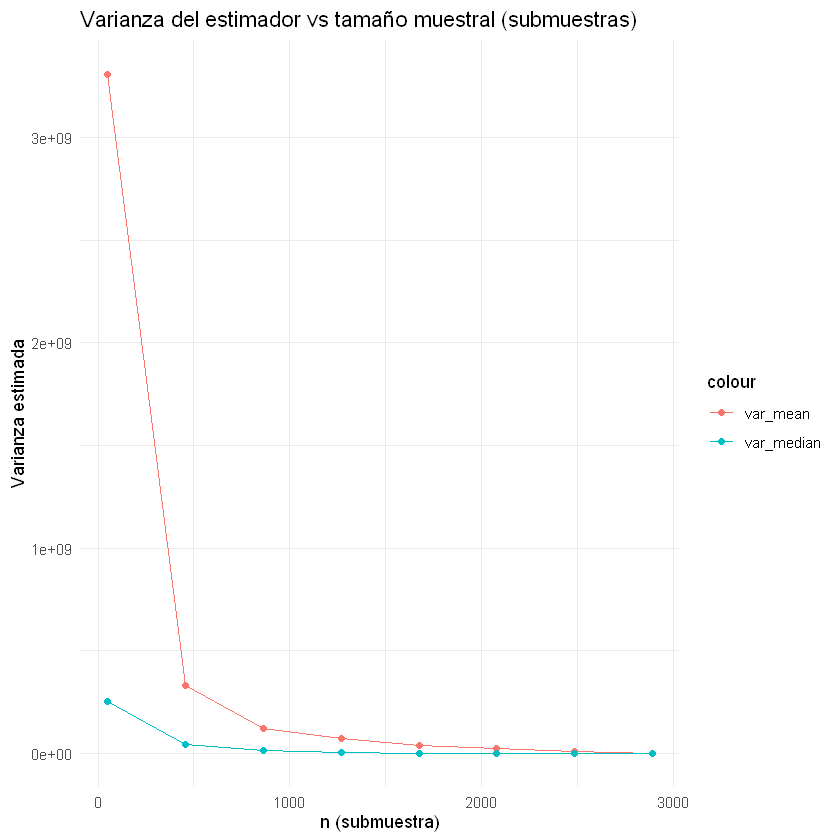

In [22]:
# ---- Celda 6: Consistencia (comportamiento varianza vs n) ------------------
library(dplyr); set.seed(123)

x <- df_var$value
x_nm <- x[!is.na(x)]

if (length(x_nm) > 30) {
  ns <- unique(floor(seq(50, length(x_nm), length.out = 8)))
  reps <- 300  # repeticiones por tamaño (moderado)
  res <- data.frame(n = integer(), var_mean = numeric(), var_median = numeric())
  for (n in ns) {
    ests_mean <- numeric(reps); ests_med <- numeric(reps)
    for (r in 1:reps) {
      s <- sample(x_nm, size = n, replace = FALSE)
      ests_mean[r] <- mean(s)
      ests_med[r] <- median(s)
    }
    res <- rbind(res, data.frame(n = n, var_mean = var(ests_mean), var_median = var(ests_med)))
  }
  print(res)

  # gráfico var vs n
  library(ggplot2)
  pcons <- ggplot(res, aes(x = n)) +
    geom_line(aes(y = var_mean, color = "var_mean")) +
    geom_point(aes(y = var_mean, color = "var_mean")) +
    geom_line(aes(y = var_median, color = "var_median")) +
    geom_point(aes(y = var_median, color = "var_median")) +
    labs(title = "Varianza del estimador vs tamaño muestral (submuestras)",
         x = "n (submuestra)", y = "Varianza estimada") + theme_minimal()
  print(pcons)
  ggsave(filename = file.path(out_dir, "consistencia_var_vs_n.png"), plot = pcons, width = 7, height = 4)
  message("Gráfico de consistencia guardado en: ", file.path(out_dir, "consistencia_var_vs_n.png"))

  cat("\nComentario (Consistencia):\nSi la varianza del estimador (mean o median) disminuye al crecer n, evidencia consistencia.\n")
} else cat("No hay suficientes datos (>30) para estudiar consistencia por submuestreo.\n")


In [ ]:
library(dplyr)
set.seed(42)

x <- df_var$value


x_nm <- x[!is.na(x)]

if (length(x_nm) > 10) {
  # bootstrap var estimadas
  B <- 1000
  b_mean <- boot(x_nm, statistic = function(d,i) mean(d[i]), R = B)
  b_median <- boot(x_nm, statistic = function(d,i) median(d[i]), R = B)
  var_mean_boot <- var(b_mean$t)
  var_median_boot <- var(b_median$t)
  rel_eff <- var_median_boot / var_mean_boot

  cat("Eficiencia (empírica via bootstrap):\n")
  cat(" Var(mean) bootstrap:", var_mean_boot, "\n")
  cat(" Var(median) bootstrap:", var_median_boot, "\n")
  cat(" Rel. effic (var_median / var_mean):", rel_eff, "\n")

  cat("\nComentario (Eficiencia):\n")
  if (rel_eff > 1) cat(" La media es más eficiente (menor var) que la mediana en esta muestra.\n") else cat(" La mediana es más eficiente en esta muestra.\n")
} else cat("No hay suficientes datos para evaluar eficiencia.\n")

# Sintaxis empleada (imprimir fragmento con comandos clave para el documento)
cat("\n--- Sintaxis clave usada en este análisis ---\n")
cat("1) Limpieza money: clean_numeric2(...) \n")
cat("2) Descriptivos: tabla_vertical (N, N missing, Min, Q1, Median, Mean, Q3, Max, SD, IQR)\n")
cat("3) Gráficas guardadas en:", file.path(out_dir, "plots"), "\n")
cat("4) IC mean (t): t.test(x)$conf.int  (o calculado manualmente)\n")
cat("5) Bootstrap bias y CI: uso package 'boot' (boot(...), boot.ci(...))\n")
cat("6) Consistencia: submuestreo comparando var(estimator) vs n\n")
cat("7) Eficiencia: comparar var_bootstrap(estimator)\n")


Eficiencia (empírica via bootstrap):
 Var(mean) bootstrap: 58275694 
 Var(median) bootstrap: 2852046 
 Rel. effic (var_median / var_mean): 0.04894057 

Comentario (Eficiencia):
 La mediana es más eficiente en esta muestra.

--- Sintaxis clave usada en este análisis ---
1) Limpieza money: clean_numeric2(...) 
2) Descriptivos: tabla_vertical (N, N missing, Min, Q1, Median, Mean, Q3, Max, SD, IQR)
3) Gráficas guardadas en: analisis_P3094S3_check/plots 
4) IC mean (t): t.test(x)$conf.int  (o calculado manualmente)
5) Bootstrap bias y CI: uso package 'boot' (boot(...), boot.ci(...))
6) Consistencia: submuestreo comparando var(estimator) vs n
7) Eficiencia: comparar var_bootstrap(estimator)
